In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
url = 'https://raw.githubusercontent.com/Onurbltc/InsuranceData/refs/heads/main/insurance.csv'

df = pd.read_csv(url)
df.head()

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.00,male,23.20,91,Yes,0,No,southeast,1121.87
1,2,24.00,male,30.10,87,No,0,No,southeast,1131.51
2,3,NaN,male,33.30,82,Yes,0,No,southeast,1135.94
3,4,NaN,male,33.70,80,No,0,No,northwest,1136.40
4,5,NaN,male,34.10,100,No,0,No,northwest,1137.01


In [67]:
pd.set_option("display.float_format", "{:.2f}".format)

In [68]:
sns.set(style="whitegrid", palette="Set2", color_codes=True, font_scale=1.2)

In [69]:
df.isna().sum().sum()

np.int64(8)

In [70]:
df.dropna(inplace=True)

In [71]:
df.describe(include='all')

,Id,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
count,1332.00,1332.00,1332,1332.00,1332.00,1332,1332.00,1332,1332,1332.00
unique,NaN,NaN,2,NaN,NaN,2,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,No,NaN,No,southeast,NaN
freq,NaN,NaN,670,NaN,NaN,695,NaN,1058,442,NaN
mean,674.47,38.09,NaN,30.66,94.19,NaN,1.10,NaN,NaN,13325.25
std,384.70,11.11,NaN,6.12,11.45,NaN,1.21,NaN,NaN,12109.62
min,1.00,18.00,NaN,16.00,80.00,NaN,0.00,NaN,NaN,1121.87
25%,341.75,29.00,NaN,26.20,86.00,NaN,0.00,NaN,NaN,4760.16
50%,674.50,38.00,NaN,30.35,92.00,NaN,1.00,NaN,NaN,9412.97
75%,1007.25,47.00,NaN,34.73,99.00,NaN,2.00,NaN,NaN,16781.33


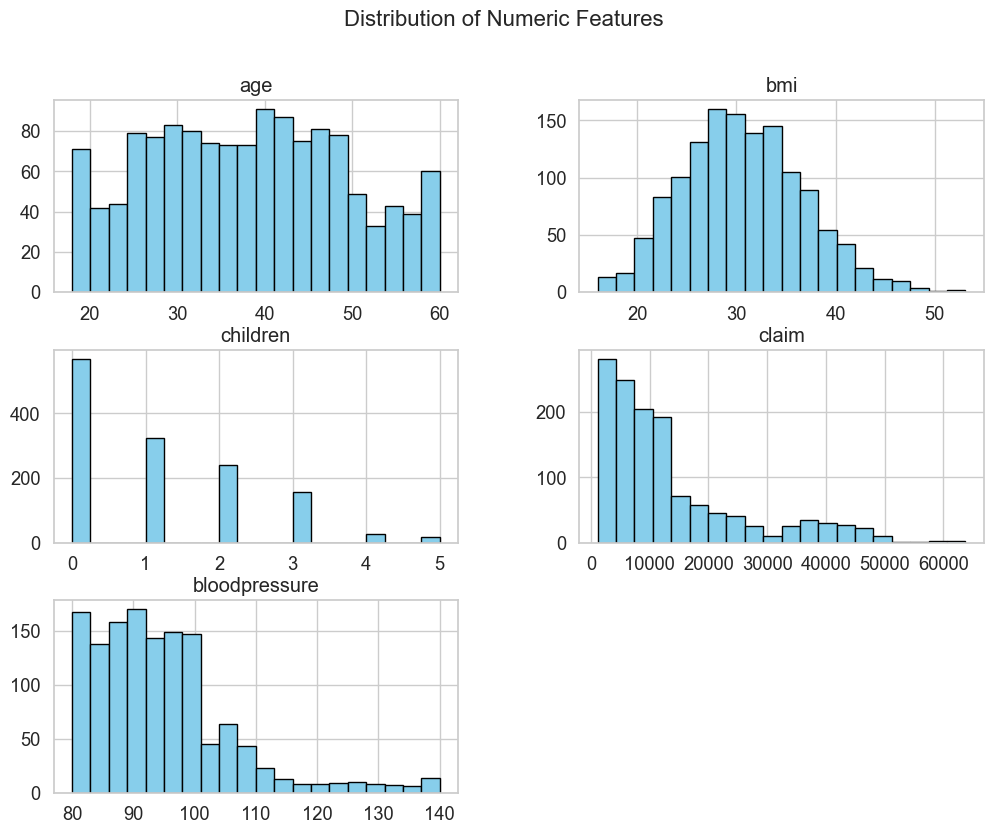

In [72]:
numeric_cols = ["age", "bmi", "children","claim", "bloodpressure"]
df[numeric_cols].hist(bins=20, figsize=(12, 9), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.show()


In [73]:
import warnings
warnings.filterwarnings("ignore")

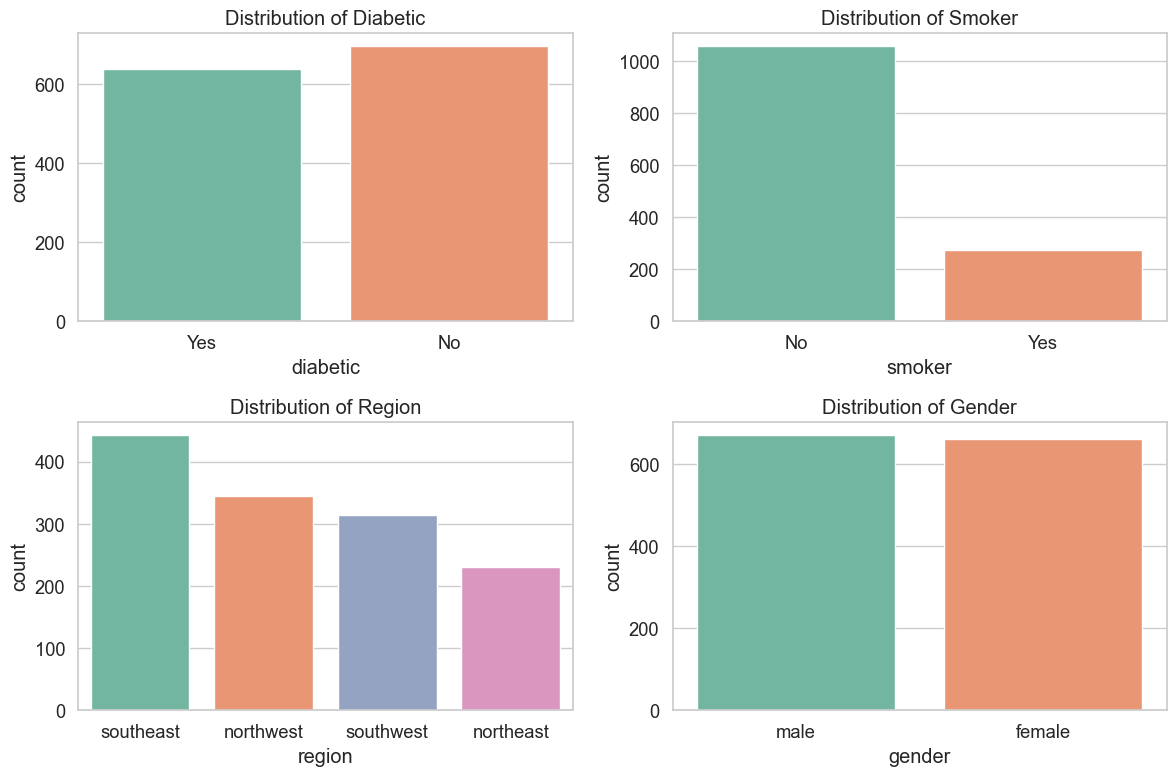

In [74]:
cate_cols = ["diabetic", "smoker", "region", "gender"]

plt.figure(figsize=(12, 8))

for i, col in enumerate(cate_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Distribution of {col.capitalize()}')
   
plt.tight_layout()
plt.show()
   

In [75]:
df.groupby(["gender", "smoker"])["claim"].mean().round(2)

gender  smoker
female  No        8762.30
        Yes      30679.00
male    No        8169.25
        Yes      33042.01
Name: claim, dtype: float64

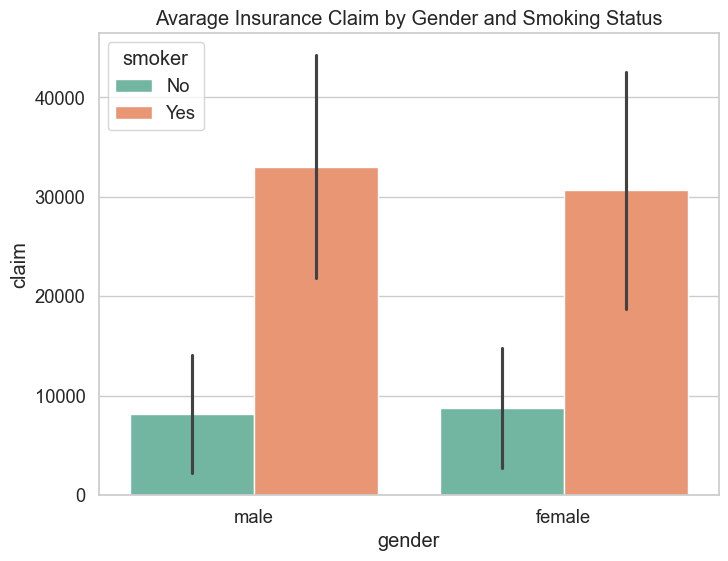

In [76]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x="gender", y="claim", hue="smoker", estimator="mean", errorbar="sd")
plt.title("Avarage Insurance Claim by Gender and Smoking Status")
plt.show()

In [77]:
pivot_region_diabetic = df.groupby(["region", "diabetic"])["claim"].mean().unstack()
pivot_region_diabetic

diabetic,No,Yes
region,,
northeast,16966.86,16818.30
northwest,11442.83,12224.96
southeast,13578.72,12574.09
southwest,13069.91,12313.74


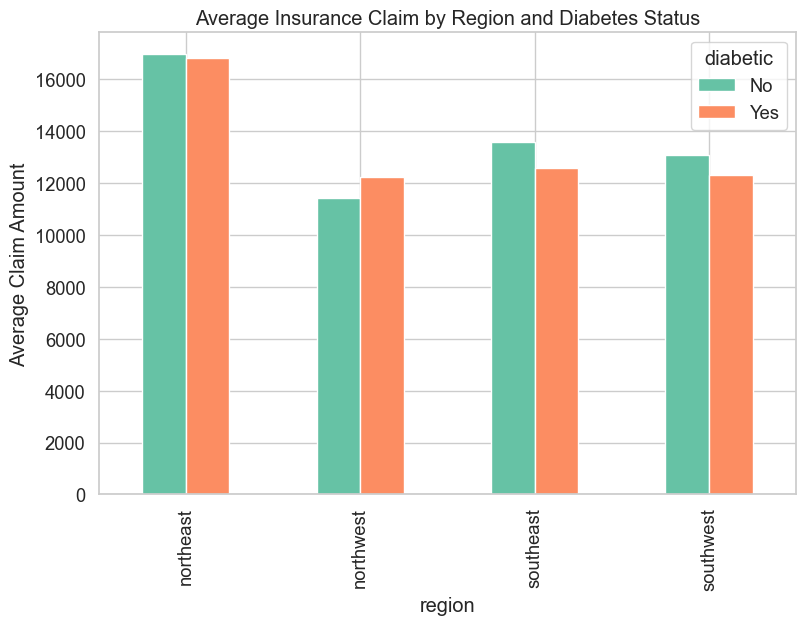

In [78]:
pivot_region_diabetic.plot(kind='bar', figsize=(9, 6))
plt.title("Average Insurance Claim by Region and Diabetes Status")
plt.ylabel("Average Claim Amount")
plt.show()

In [79]:
pivot_table = pd.pivot_table(df, values='claim', index='children', columns='diabetic', aggfunc=np.mean)
pivot_table

diabetic,No,Yes
children,,
0,12967.40,11985.29
1,12730.46,12732.06
2,15567.77,14579.36
3,13807.61,17091.26
4,14106.63,13573.35
5,8519.04,9205.59


In [80]:
numeric_cols

['age', 'bmi', 'children', 'claim', 'bloodpressure']

In [81]:
df[numeric_cols].corr()

,age,bmi,children,claim,bloodpressure
age,1.00,-0.04,-0.03,-0.03,-0.06
bmi,-0.04,1.00,0.01,0.20,0.14
children,-0.03,0.01,1.00,0.06,-0.03
claim,-0.03,0.20,0.06,1.00,0.53
bloodpressure,-0.06,0.14,-0.03,0.53,1.00


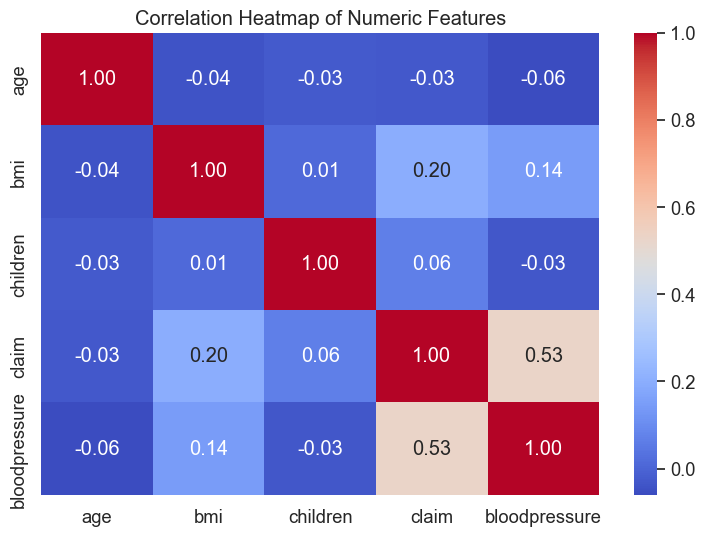

In [82]:
plt.figure(figsize=(9, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

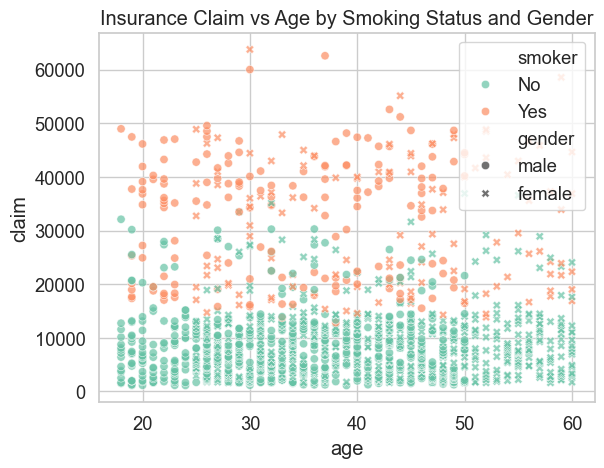

In [83]:
sns.scatterplot(data=df, x='age', y='claim', hue='smoker', style='gender', alpha=0.7)
plt.title("Insurance Claim vs Age by Smoking Status and Gender")
plt.show()

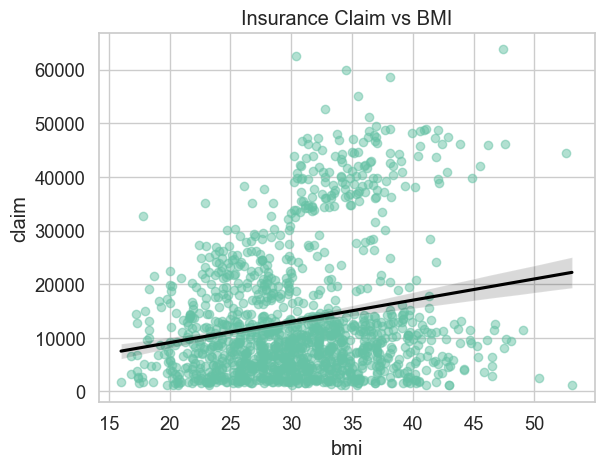

In [84]:
sns.regplot(data=df, x='bmi', y='claim', scatter_kws={'alpha':0.5}, line_kws={'color':'black'})
plt.title("Insurance Claim vs BMI")
plt.show()

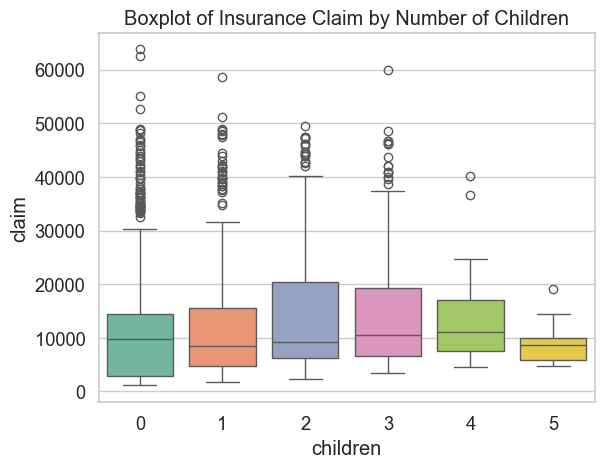

In [85]:
sns.boxplot(data=df, x='children', y='claim', palette='Set2')
plt.title("Boxplot of Insurance Claim by Number of Children")
plt.show()

In [86]:
df["age_group"] = pd.cut(df["age"], bins=[0, 17, 30, 45, 60, 100], labels=["<18", "18-30", "31-45", "46-60", "61+"])

In [87]:
df["age_group"].value_counts()

age_group
31-45    553
18-30    396
46-60    383
<18        0
61+        0
Name: count, dtype: int64

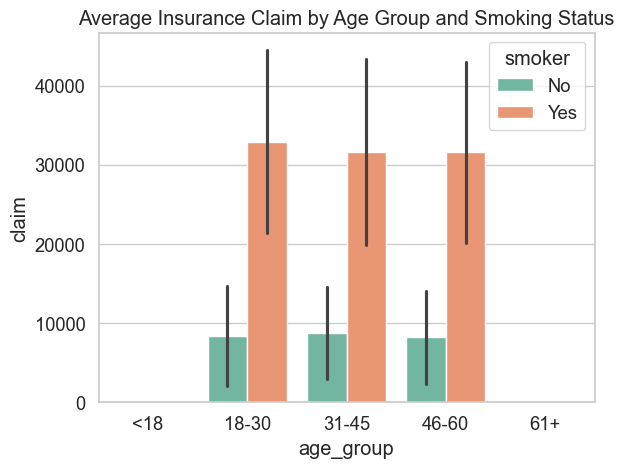

In [88]:
sns.barplot(data=df, x="age_group", y="claim", hue="smoker", estimator="mean", errorbar="sd")
plt.title("Average Insurance Claim by Age Group and Smoking Status")
plt.show()

In [89]:
df["bmi_category"] = pd.cut(df["bmi"], bins=[0, 18.5, 24.9, 29.9, 100], labels=["Underweight", "Normal", "Overweight", "Obese"])
df["bmi_category"].value_counts()

bmi_category
Obese          702
Overweight     387
Normal         222
Underweight     21
Name: count, dtype: int64

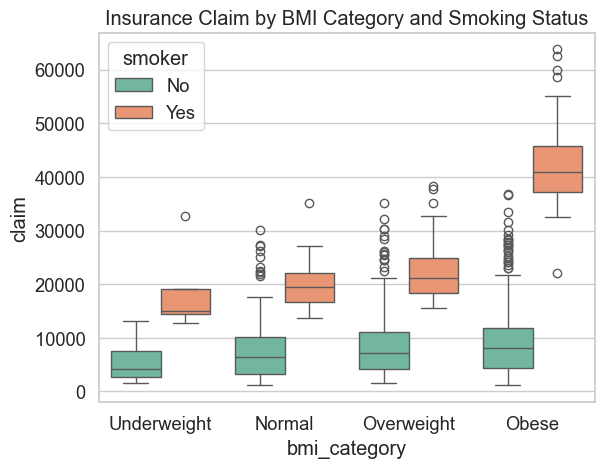

In [90]:
sns.boxplot(data=df, x="bmi_category", y="claim", hue="smoker", palette="Set2")
plt.title("Insurance Claim by BMI Category and Smoking Status")
plt.show()

In [91]:
region_stats = df.groupby("region").agg(
    smoker_rate=("smoker", lambda x: (x == 'Yes').mean() * 100),
    mean_claim=("claim", "mean")
).reset_index()

In [92]:
df['smoker'].unique()

array(['No', 'Yes'], dtype=object)

In [93]:
region_stats

,region,smoker_rate,mean_claim
0,northeast,29.00,16889.04
1,northwest,16.81,11794.22
2,southeast,20.59,13085.50
3,southwest,18.47,12723.13


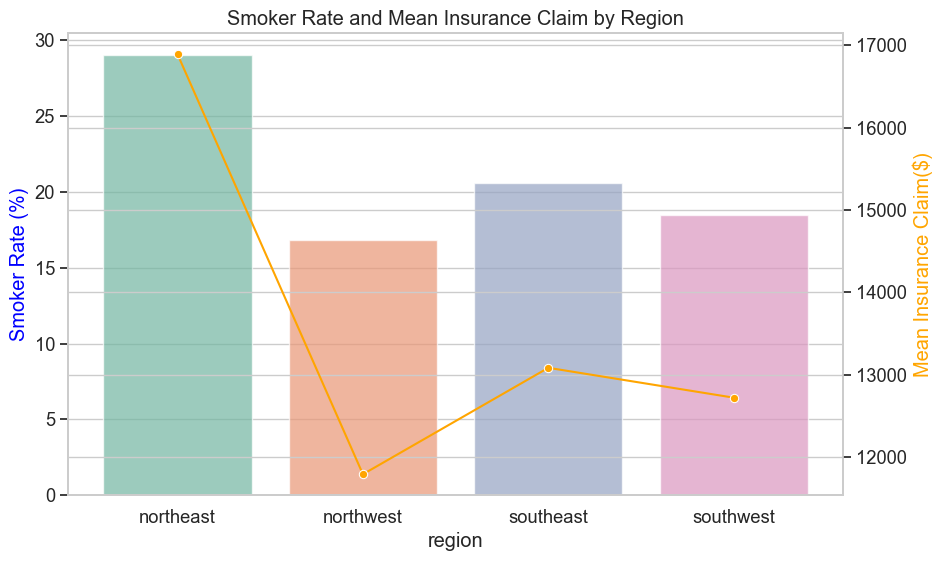

In [94]:
fig, ax1 = plt.subplots(figsize=(10, 6))
sns.barplot(data=region_stats, x="region", y="smoker_rate", ax=ax1, alpha=0.7, palette="Set2")
ax2 = ax1.twinx()
sns.lineplot(data=region_stats, x="region", y="mean_claim", ax=ax2, marker="o", color='orange')

ax1.set_ylabel("Smoker Rate (%)", color='blue')
ax2.set_ylabel("Mean Insurance Claim($)", color='orange')
plt.title("Smoker Rate and Mean Insurance Claim by Region")
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

In [96]:
df.columns

Index(['Id', 'age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children',
       'smoker', 'region', 'claim', 'age_group', 'bmi_category'],
      dtype='object')

In [97]:
X = df[['age', 'gender', 'bmi', 'children', 'smoker','diabetic', 'bloodpressure']]
y = df['claim']

In [98]:
cate_cols = ['gender', 'smoker', 'diabetic']
label_encoders = {}

In [99]:
for col in cate_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

    joblib.dump(le, f'label_encoder_{col}.pkl')

In [100]:
label_encoders

{'gender': LabelEncoder(),
 'smoker': LabelEncoder(),
 'diabetic': LabelEncoder()}

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
numeric_cols = ['age', 'bmi', 'children', 'bloodpressure']
scaler = StandardScaler()

In [103]:
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [104]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [105]:
print(X_train.shape, y_train.shape)

(1065, 7) (1065,)


In [106]:
print(X_test.shape, y_test.shape)

(267, 7) (267,)


In [107]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_val_score   
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor    

In [108]:
def evaluate_model(model, X_train,X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return {'R2': r2, 'MAE': mae, 'RMSE': rmse}

In [109]:
results = {}

In [110]:
# -------------------------
# Linear Regression
# -------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)

results['Linear Regression'] = evaluate_model(
    lr, X_train, X_test, y_train, y_test
)
print("Linear Regression model trained")


# -------------------------
# Polynomial Regression
# -------------------------
best_poly = {
    "degree": None,
    "model": None,
    "poly": None,
    "score": -np.inf
}

for degree in [2, 3]:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    score = model.score(X_test_poly, y_test)

    if score > best_poly["score"]:
        best_poly = {
            "degree": degree,
            "model": model,
            "poly": poly,
            "score": score
        }

# unpack
degree = best_poly["degree"]
poly_model = best_poly["model"]
poly_transform = best_poly["poly"]

results[f"Polynomial Regression (degree={degree})"] = evaluate_model(
    poly_model,
    poly_transform.fit_transform(X_train),
    poly_transform.transform(X_test),
    y_train,
    y_test
)
print(f"Polynomial Regression model (degree={degree}) trained")



# Random Forest

rf = RandomForestRegressor()

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, scoring='r2')
rf_grid.fit(X_train, y_train)

best_rf = rf_grid.best_estimator_
results['Random Forest'] = evaluate_model(best_rf, X_train, X_test, y_train, y_test)

print("Random Forest training completed, best parameters:", rf_grid.best_params_)


# -------------------------
# Support Vector Regressor
# -------------------------
svr = SVR()

svr_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'degree': [2, 3]
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, n_jobs=-1, scoring='r2')
svr_grid.fit(X_train, y_train)

best_svr = svr_grid.best_estimator_
results['SVR'] = evaluate_model(best_svr, X_train, X_test, y_train, y_test)

print("SVR training completed, best parameters:", svr_grid.best_params_)


# -------------------------
# XGBoost
# -------------------------
xgb = XGBRegressor(objective='reg:squarederror')

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, n_jobs=-1, scoring='r2')
xgb_grid.fit(X_train, y_train)

best_xgb = xgb_grid.best_estimator_
results['XGBoost'] = evaluate_model(best_xgb, X_train, X_test, y_train, y_test)

print("XGBoost training completed, best parameters:", xgb_grid.best_params_)


Linear Regression model trained
Polynomial Regression model (degree=2) trained
Random Forest training completed, best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
SVR training completed, best parameters: {'C': 100, 'degree': 2, 'epsilon': 0.5, 'kernel': 'linear'}
XGBoost training completed, best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [111]:
results

{'Linear Regression': {'R2': 0.7186402865210721,
  'MAE': 5034.26319889741,
  'RMSE': np.float64(6368.137982018986)},
 'Polynomial Regression (degree=2)': {'R2': 0.7757814325424964,
  'MAE': 4426.3218151787405,
  'RMSE': np.float64(5684.827554251738)},
 'Random Forest': {'R2': 0.8197605637771442,
  'MAE': 3904.2988669844144,
  'RMSE': np.float64(5096.903586907529)},
 'SVR': {'R2': 0.588800077955784,
  'MAE': 5445.984809628699,
  'RMSE': np.float64(7698.533788937231)},
 'XGBoost': {'R2': 0.8271200253293132,
  'MAE': 3896.730014447273,
  'RMSE': np.float64(4991.761803428732)}}

In [112]:
results_df = pd.DataFrame(results).T.sort_values(by='R2', ascending=False)
results_df

,R2,MAE,RMSE
XGBoost,0.83,3896.73,4991.76
Random Forest,0.82,3904.30,5096.90
Polynomial Regression (degree=2),0.78,4426.32,5684.83
Linear Regression,0.72,5034.26,6368.14
SVR,0.59,5445.98,7698.53


In [113]:
models = {
    'Linear Regression': lr,
    'Polynomial Regression)': poly_model,
    'Random Forest': best_rf,
    'SVR': best_svr,
    'XGBoost': best_xgb
}

In [114]:
best_r2 = results_df["R2"].max()

In [115]:
best_r2

np.float64(0.8271200253293132)

In [116]:
top_model_name = results_df[results_df ["R2"] == best_r2]
top_model_name

,R2,MAE,RMSE
XGBoost,0.83,3896.73,4991.76


In [117]:
best_model_name = models[top_model_name.index[0]]
best_model_name

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [118]:
joblib.dump(best_model_name, 'best_insurance_model.pkl')
print(f"Best model selected: {top_model_name.index[0]}")

Best model selected: XGBoost
